## Import package

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [38]:
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

## Data Process

In [39]:
winequality_red_data = pd.read_csv('Data/winequality-red.csv', sep=';')
winequality_white_data = pd.read_csv('Data/winequality-white.csv', sep=';')
print('winequality_red Dataset')
winequality_red_data.head()

winequality_red Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
print('winequality_white Dataset')
winequality_white_data.head()

winequality_white Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Check missing value

In [41]:
Missing_Counts(winequality_red_data).head()

,Column Name,Missing Count,Percentage(%)
0,fixed acidity,0,0.00%
1,volatile acidity,0,0.00%
2,citric acid,0,0.00%
3,residual sugar,0,0.00%
4,chlorides,0,0.00%


In [42]:
Missing_Counts(winequality_white_data).head()

,Column Name,Missing Count,Percentage(%)
0,fixed acidity,0,0.00%
1,volatile acidity,0,0.00%
2,citric acid,0,0.00%
3,residual sugar,0,0.00%
4,chlorides,0,0.00%


### Merge_data

In [43]:
winequality_red_data['Wine_type'] = 0
winequality_white_data['Wine_type'] = 1
merge_data = pd.concat([winequality_red_data, winequality_white_data], ignore_index=True)

In [44]:
merge_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Type of Wine


<Axes: ylabel='count'>

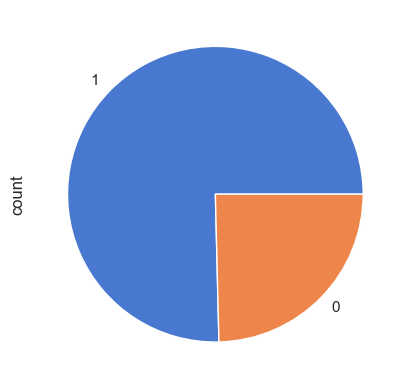

In [45]:
print('Type of Wine')
merge_data['Wine_type'].value_counts().plot(kind='pie')

### Encoding Data

In [46]:
X = merge_data.drop(columns='Wine_type')
y = merge_data['Wine_type']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 39)

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9854


### Feature Engineer - Normalization

針對右偏分布資料進行正規化。

In [48]:
from sklearn.preprocessing import MinMaxScaler

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 假設你要對某些數值列進行正規化
columns_to_scale = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']

# 使用 fit_transform 方法對這些列進行正規化
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.413333,0.00,0.019939,0.111296,0.034722,0.064516,0.99780,3.51,0.191011,9.4,5
1,7.8,0.533333,0.00,0.030675,0.147841,0.083333,0.140553,0.99680,3.20,0.258427,9.8,5
2,7.8,0.453333,0.04,0.026074,0.137874,0.048611,0.110599,0.99700,3.26,0.241573,9.8,5
3,11.2,0.133333,0.56,0.019939,0.109635,0.055556,0.124424,0.99800,3.16,0.202247,9.8,6
4,7.4,0.413333,0.00,0.019939,0.111296,0.034722,0.064516,0.99780,3.51,0.191011,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.086667,0.29,0.015337,0.049834,0.079861,0.198157,0.99114,3.27,0.157303,11.2,6
6493,6.6,0.160000,0.36,0.113497,0.063123,0.194444,0.373272,0.99490,3.15,0.134831,9.6,5
6494,6.5,0.106667,0.19,0.009202,0.053156,0.100694,0.241935,0.99254,2.99,0.134831,9.4,6
6495,5.5,0.140000,0.30,0.007669,0.021595,0.065972,0.239631,0.98869,3.34,0.089888,12.8,7


### Feature Engineer - Transform

In [49]:
from sklearn.preprocessing import PowerTransformer

# 初始化 PowerTransformer 進行 Yeo-Johnson 變換
pt = PowerTransformer(method='yeo-johnson')

# 應用變換
columns_to_scale = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']

# 使用 fit_transform 方法對這些列進行正規化
X[columns_to_scale] = pt.fit_transform(X[columns_to_scale])

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,1.772136,0.00,-0.844949,1.105019,-1.233995,-1.449548,0.99780,3.51,0.399814,9.4,5
1,7.8,2.077032,0.00,-0.538013,1.617033,-0.202072,-0.861507,0.99680,3.20,1.125357,9.8,5
2,7.8,1.891911,0.04,-0.664967,1.501276,-0.913555,-1.092882,0.99700,3.26,0.964002,9.8,5
3,11.2,-0.188143,0.56,-0.844949,1.075184,-0.761434,-0.986049,0.99800,3.16,0.536651,9.8,6
4,7.4,1.772136,0.00,-0.844949,1.105019,-1.233995,-1.449548,0.99780,3.51,0.399814,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,-0.904454,0.29,-0.988494,-0.622015,-0.267948,-0.417532,0.99114,3.27,-0.056469,11.2,6
6493,6.6,0.143667,0.36,0.918470,-0.112389,1.430865,0.924849,0.99490,3.15,-0.403914,9.6,5
6494,6.5,-0.573770,0.19,-1.192128,-0.485330,0.111409,-0.080937,0.99254,2.99,-0.403914,9.4,6
6495,5.5,-0.100506,0.30,-1.245337,-2.094819,-0.542771,-0.098635,0.98869,3.34,-1.224775,12.8,7


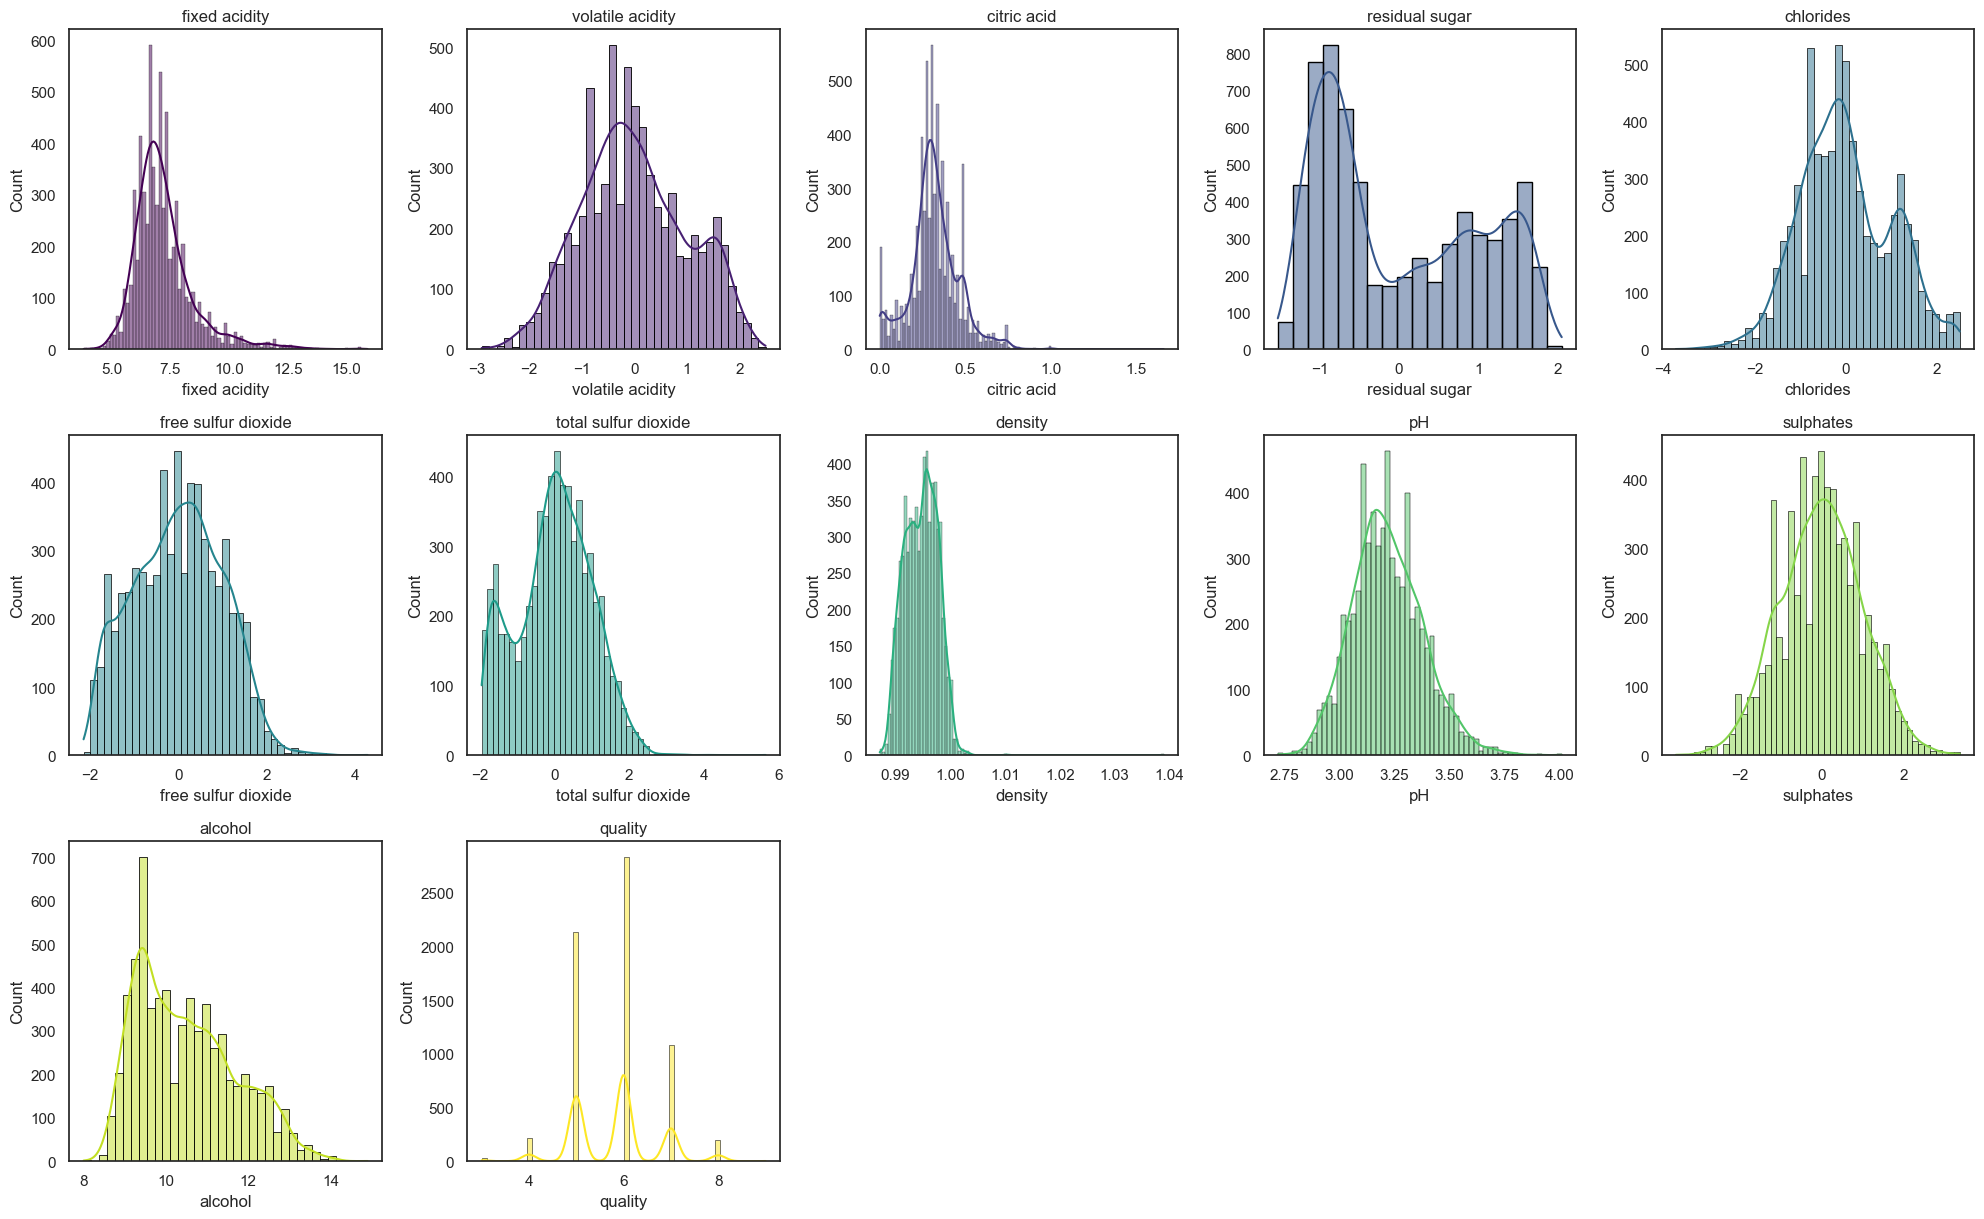

In [50]:
plt.figure(figsize=(20, 20))
sns.set(style="white", palette="muted")
colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

for i, col in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[col], kde=True, color=colors[i], edgecolor="black")
    plt.title(col)
    plt.tight_layout()

plt.show()

## Build Model

In [51]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 39)

model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

## Result

In [52]:
y_pred_test = model.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9877


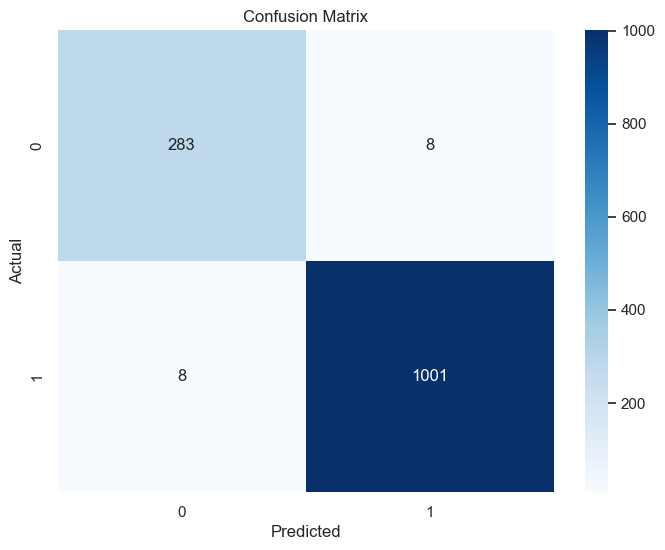

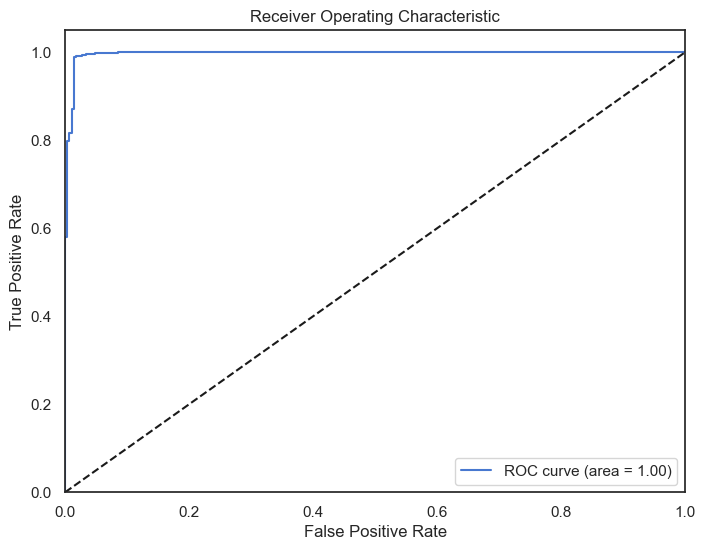

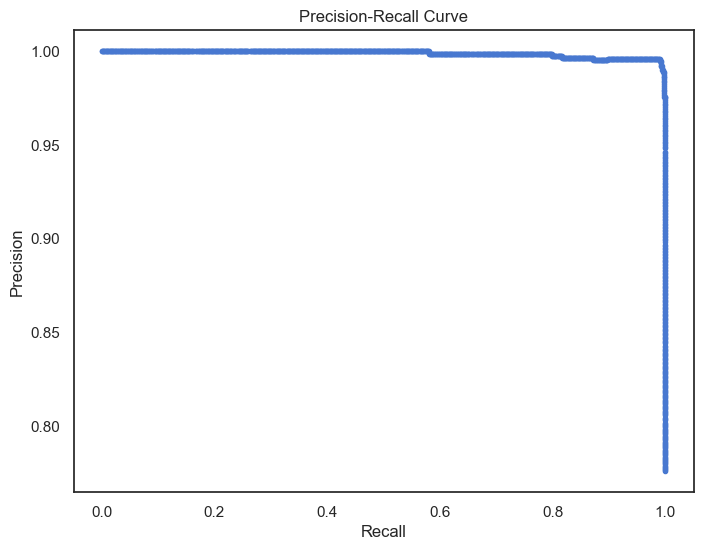

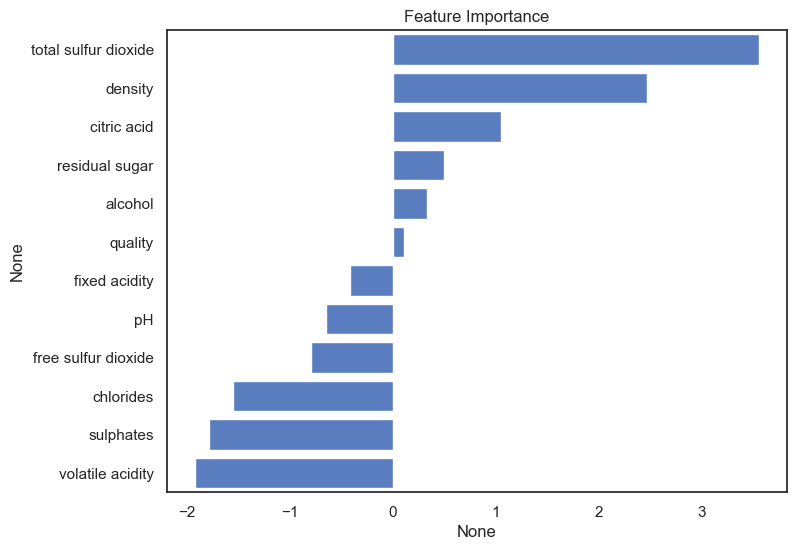

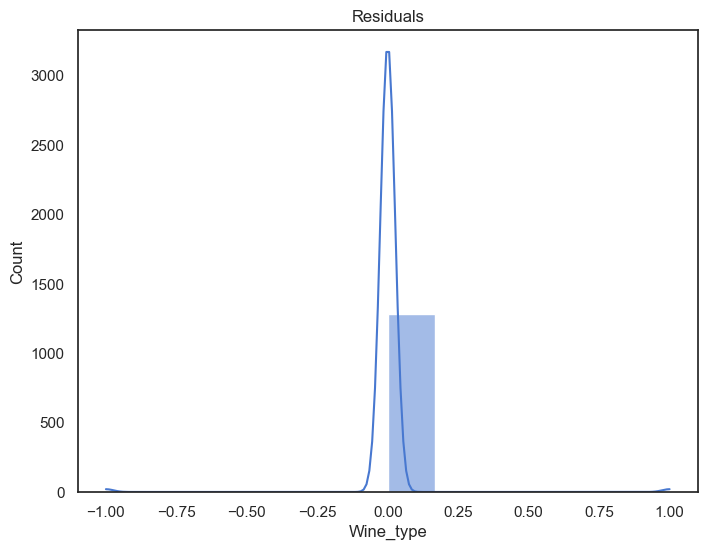

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. 混淆矩陣
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 繪製混淆矩陣
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.metrics import roc_curve, auc

# 計算 ROC 曲線
y_prob = model.predict_proba(X_test)[:, 1]  # 獲取正類的概率
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


from sklearn.metrics import precision_recall_curve

# 計算精確度-召回曲線
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 繪製精確度-召回曲線
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# 4. 特徵重要性圖 (Logistic回歸模型中通常使用係數)
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

# 5. 殘差圖
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals')
plt.show()